# Do our “meetupers” provide extra mobility predictability for us?

*Updated: 20 March 2020*

**By Zexun Chen (sxtpy2010@gmail.com)**

All the algorithms are released on the GitHub, please refer to Github repo [social-predictability](https://github.com/Magica-Chen/social-predictability) if you're interested.

Everyday we will meet up many people in various places. Although some  of the people we met are our friends, or at least, we know each other, a larges percentage of individuals are our “meetupers” who just visit the same locations as us at the same time.

As  we know, friendship as social information, is probably useful to provide extra information of ourselves. Unfortunately,  we may have difficulties in collecting actual and accurate friendship network for an individual due to privacy policy and ambiguous definition of friendship. Nowadays, with the development digital technology, we have more digital check-ins using mobile phone. The check-ins datasets usually contain our basic information, for example, username or user ID, location or place ID, and check-in time.  Based on these check-in information, it is not difficult to extract the “meetupers” information for every users. Consequently, the question you probably ask, 

***do our “meetupers” provide more mobility predictability for us?*** 

To answer this question, we will start our experiment on a public human mobility dataset.

## Dataset

### Data description

***Weeplace dataset***: a data visualisation application that allows users to visualise their check-ins on other LBSNs. Our data include more than 7 million check-ins produced by more than 15,000 Foursquare users visiting over 1 million locations in approximately 50,000 cities worldwide from Nov 2003 to Jun 2011. At the time the data was collected, users manually checked in to locations in order to earn points,  badges, and titles (e. q., "mayor") at locations they frequented, including their own homes. Foursquare also had hundreds of thousands of local businesses partners who offered incentives for checking in, such as discounts and free food. Together, these features incentivised frequent check-ins. The data we use here corresponds to the Foursquare users who have provided their data to the Weeplace service (now defunct) in order to create dynamic visualisations of their activities.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_csv('data/weeplace_checkins.csv')

In [3]:
Nr_record = df_raw.shape[0]
Nr_user = len(set(df_raw['userid'].tolist()))
Name_col = list(df_raw.columns)
Nr_col = len(Name_col)

In this raw dataset, there are ***{{Nr_col}}*** attributes, including ***{{Name_col}}***. There are totally ***{{Nr_record}}*** records from ***{{Nr_user}}*** users, averagely ***{{Nr_record / Nr_user}}*** records per user. The details of how many records each user has are shown in the below:

In [4]:
df_raw.groupby('userid')['datetime'].count().reset_index(name='count')['count'].describe()

count    15799.000000
mean       484.737515
std        530.819991
min          1.000000
25%        147.000000
50%        329.000000
75%        638.000000
max       7338.000000
Name: count, dtype: float64

### Data pre-process

Since our definition of "meetup" is based on userid, placeid, and datetime, we should remove any records with incomplete attributes.

In [5]:
df_wp = df_raw.dropna(subset=['userid', 'placeid', 'datetime'])
Np_record = df_wp.shape[0]
Np_user = len(set(df_wp['userid'].tolist()))

In this processed dataset, There are totally ***{{Np_record}}*** records from ***{{Np_user}}*** users, averagely ***{{Np_record / Np_user}}*** records per user. The details of how many records each user has are shown in the below:

In [6]:
df_wp.groupby('userid')['datetime'].count().reset_index(name='count')['count'].describe()

count    15793.000000
mean       466.644209
std        509.988549
min          1.000000
25%        138.000000
50%        316.000000
75%        621.000000
max       7338.000000
Name: count, dtype: float64

## Find all "meetupers" for the whole dataset

**Definition 1 (meetuper)**: for a specific user $A$, any one who has at least one same check-in record of placeid with the user $A$ at the same time, is defined as $A$'s "meetuper".

**Remark**: for numerical computation, we remove minutes and seconds information of datetime, thus here "at same time" means at the same hour-based time slot.

The method we used to generate meetupers information refers to `find_meetup()` and `all_meetup` in the class Meetup.

In [12]:
import meetup_strategy as ms

In [13]:
LetMeet = ms.Meetup(path='data/weeplace_checkins.csv')

You can obtain meetup information and users' temporal placeid by
```python
user_meetup = LetMeet.all_meetup()   # it will cost a long time
user_placeidT = LetMeet.temporal_placeid() # it will cost a long time
```

In order to show the results, we just import our results here and define a MeetupStategy directly.

In [14]:
# This is only to show our results quickly
import pickle

# import meetup_store
pickle_in = open("results/meetup_store.pickle", "rb")
# pickle_in = open("social-predictability/meetup_store.pickle", "rb")
meetup_store = pickle.load(pickle_in)
pickle_in.close()

# concat as a dataframe
user_meetup=pd.concat(meetup_store)
user_meetup=user_meetup.rename(columns = {'count':'meetup'})

### Descriptive statistics of Meetupers

In [36]:
Nm_user = len(set(user_meetup['userid_x'].tolist()))

There are **{{Nm_user}}** (out of total **{{Np_user}}**) who have at least one meetuper. The descriptive statistics are in the below:

In [37]:
user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'].describe()

count    14327.000000
mean        91.303692
std        181.843077
min          1.000000
25%          7.000000
50%         27.000000
75%         88.000000
max       3045.000000
Name: meetupers, dtype: float64

There are **25%** users have **88** meetupers, **50%** users have **27** meetupers, and **75%** users have **7** meetupers.

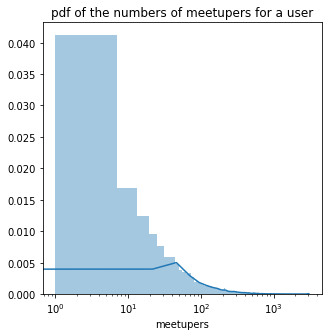

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'], 
             bins=500)
ax.set_xscale('log')
plt.title('pdf of the numbers of meetupers for a user')
plt.show()

Let's see more details about meetupers.

In [ ]:
user_stats = pd.read_csv('results/user-meetup-info.csv')
ego_stats = pd.read_csv('results/user-ego-info.csv')